In [1]:
from rcwa4d import *
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

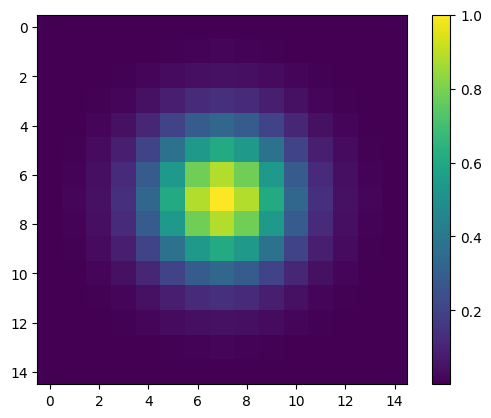

In [9]:
sigma_k = (2.590001111E-3)/3
ks = np.linspace(-3.00042311E-3,3.00042311E-3,15)
kxs, kys = np.meshgrid(ks,ks)
kincs = np.vstack([kxs.flatten(),kys.flatten()]).T
amps = np.exp(- (kxs**2 + kys**2) / (2 * sigma_k**2))


plt.imshow(amps)
plt.colorbar()


In [4]:
def gaussian_real_space(x, w0, z, freq, shift):
    """Calculate the Gaussian beam shape in real space at a distance z."""
    z_R = 2 * np.pi * w0**2 *freq  # Rayleigh range
    #w_z = w0 * np.sqrt(1 + (z / z_R)**2)  # Beam width at distance z
    # return np.exp(-(x+shift)**2 / (2*w_z**2))
    return (( 1j/(z+1j*z_R)) * np.exp(-1j * 2 * np.pi * freq * (x**2 / (2 * (z+1j*z_R))) ) ) ### amp, not intensity

Plotting outside field


225it [00:04, 54.21it/s]


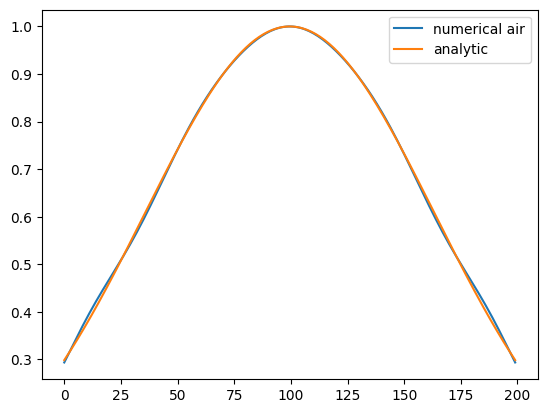

In [12]:
freq = 0.4295501
Nx=Ny=1000
air = np.ones([Nx, Nx])
ind=1

obj2 = rcwa([air], [1.5E6], [1], twist=0, N=ind, M=ind, verbose=0)
tmp = SummedRCWA(obj2, freq, kincs, amps)
tmp.total_RT()
fields = tmp.get_field(len(obj2.layer_thicknesses),1,0,real_space=True)
ex,ey,ez,hx,hy,hz = fields
center_inxex = len(ex) // 2

data = np.abs(ex[center_inxex,:])**2 + np.abs(ey[center_inxex,:])**2 + np.abs(ez[center_inxex,:])**2
data /= np.max(data)
plt.plot(data,label='numerical air')
n_pts = 200


gaussian = np.abs(gaussian_real_space(np.linspace(-1.5E3,1.5E3,n_pts), 1/(sigma_k*2*np.pi*freq), 1.5E6, freq, 0))**2

gaussian /= np.max(gaussian)
plt.plot(gaussian,label='analytic')
plt.legend()


plt.show()
